In [5]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import datetime
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_sample = pd.read_csv('20171016-210106-DataSample.csv',dtype={"value": float})
data_sample2 = pd.read_csv('20171016-210304-DataSample.csv',dtype={"value": float})
data_sample3 = pd.read_csv('20171016-210529-DataSample.csv',dtype={"value": float})
data_sample4 = pd.read_csv('20171016-235959-DataSample.csv',dtype={"value": float})

data_sample = data_sample.append([data_sample2,data_sample3,data_sample4])
data_sample['startDate'] = pd.to_datetime(data_sample['startDate']) 
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)
data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['endDate'] = pd.to_datetime(data_sample['endDate'])


to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday 
data_sample['owner'].unique()

array(['00000000-56ff-538b-2223-e1800b5e3ddb',
       '00000000-5851-ee08-eb34-e20acc5af74e',
       'd145b032-b7a5-4fa8-9887-b46598f4683a',
       '00000000-5951-4787-2497-ae32dc8d07d4',
       '00000000-584e-1f39-bdee-d4102b989d01',
       '00000000-584d-a4f0-bdee-d4102b989ce5'], dtype=object)

# Do not run this cell. 

data_sample = pd.read_csv('20171016-210106-DataSample.csv',dtype={"value": str})
data_sample2 = pd.read_csv('20171016-210304-DataSample.csv',dtype={"value": str})
data_sample3 = pd.read_csv('20171016-210529-DataSample.csv',dtype={"value": str})
data_sample4 = pd.read_csv('20171016-235959-DataSample.csv',dtype={"value": str})


#data_sample2['value'] = pd.to_numeric(data_sample2['value'],errors='coerce')
#data_sample['value'] = pd.to_numeric(data_sample['value'],errors='coerce')
data_sample = data_sample.append(data_sample2)
#data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)


types = data_sample['type'].unique()
types

for t in types:
    f = lambda x: float(x.replace(',',''))
    # checks if the values contain decimal points, and uses a float conversion if so
    for v in data_sample.loc[data_sample['type'] == t, 'value'].head():
        if '.' in v:
            f = lambda x: float(x.replace(',',''))
            break
    data_sample.loc[data_sample['type'] == t, 'value'] = data_sample.loc[data_sample['type'] == t, 'value'].map(f)
for col in ['startDate', 'endDate', 'createdAt', 'updatedAt']:
    data_sample[col] = pd.to_datetime(data_sample[col], format='%Y-%m-%d %X')
to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday 

# Sleep 

In [8]:
#Sleep -Lucas 
    #How long are they sleeping per day, what day highest/lowest 
    #Disturbances during night
    #Compared to national average
    #Correlate amount of sleep with avg steps

#Next Questions (Aydin as well)
    #Differences in activity (steps,HR) on days with more/less than average sleep duration
    #Differences in activity when number of disturbances is more/less than averages
    #Include also, same as above, but for a whole standard deviation above/below the average. 

### put code here

In [11]:
data_sample_lucas =  data_sample.copy()
sleep = data_sample_lucas[data_sample_lucas.type == 'health-sleep'].drop(['_id', 'sourceId', 'sourceName', 'value', 'content', 'originalData'], axis = 1)

#setting startDate as index of sleep
sleep.set_index(sleep.startDate, inplace = True)

#Average Hours of Sleep by Day
sleep_allusers_average = sleep.groupby('day_of_week').sum().drop(['type'], axis = 1)
count = sleep.groupby('day_of_week').count().drop(['type', 'startDate', 'endDate', 'createdAt', 'updatedAt'], axis = 1)
count = count.rename(columns={'duration': 'numcount'})
sleep_allusers_average.duration = [i.total_seconds() for i in sleep_allusers_average.duration]
sleep_allusers_average.duration = sleep_allusers_average.duration / count.numcount

## Overage Average Hours of Total Sleep by Day

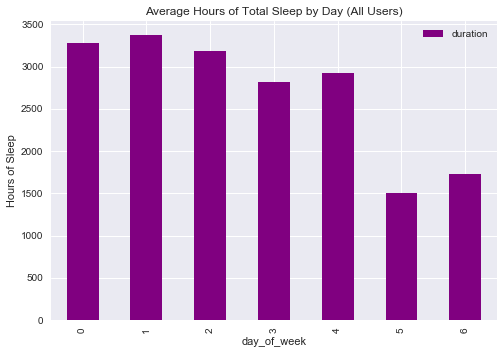

In [12]:
sleep_allusers_average.plot(kind = 'bar', title = 'Average Hours of Total Sleep by Day (All Users)', color = 'purple')
plt.ylabel('Hours of Sleep')

In [13]:
#dictionary of sleep by owners
owners = set(sleep.owner)
sleep_owners = {}
for i in owners:
    sleep_owners[i] = sleep[sleep.owner == i]

In [14]:
sleep_owners_main = {}
sleep_owners_alt = {}
for key, df in sleep_owners.items():
    temp = df.groupby(pd.TimeGrouper('6H')).count().drop(['owner', 'source', 'type', 'startDate', 'endDate', 'createdAt', 'updatedAt', 'duration'], axis = 1)
    temp.columns = ['count']
    tmp1 = temp[2::4].add(temp[3::4].reindex(temp[2::4].index), fill_value=0)
    tmp2 = temp[::4].add(temp[4::4].reindex(temp[::4].index), fill_value=0)
    sleep_owners_main[key] = tmp1
    sleep_owners_alt[key] = tmp2

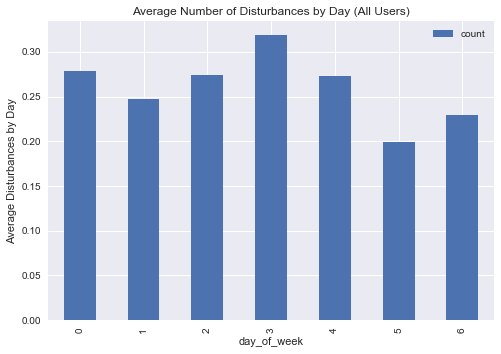

In [15]:
disturbances = sleep.groupby(pd.TimeGrouper('D')).count().drop(['owner', 'source', 'type', 'startDate', 'endDate', 'createdAt', 'updatedAt', 'duration'], axis = 1)
disturbances.columns = ['count']
disturbances['startDate'] = disturbances.index.get_values()
disturbances['day_of_week'] = disturbances['startDate'].dt.dayofweek
disturbances = disturbances.drop('startDate', axis = 1).groupby('day_of_week').sum()
disturbances['count'] = disturbances['count']/(len(sleep.groupby(pd.TimeGrouper('D')).count()))/7
disturbances.plot(kind = 'bar', title = 'Average Number of Disturbances by Day (All Users)')
plt.ylabel('Average Disturbances by Day')

## Disturbances by User


In [17]:
sleep_owners_alt['00000000-56ff-538b-2223-e1800b5e3ddb'].head(n=5)

,count,startDate,day_of_week
startDate,,,
2012-01-19 06:00:00,119.0,2012-01-19 06:00:00,3
2012-01-20 06:00:00,98.0,2012-01-20 06:00:00,4
2012-01-21 06:00:00,112.0,2012-01-21 06:00:00,5
2012-01-22 06:00:00,0.0,2012-01-22 06:00:00,6
2012-01-23 06:00:00,0.0,2012-01-23 06:00:00,0


In [18]:
#adding day_of_week to data frames in sleep_owners_main/alt so that we can resample by day of week
for key, df in sleep_owners_main.items():
    df['startDate'] = df.index.get_values()
    df['day_of_week'] = df['startDate'].dt.dayofweek
    
for key, df in sleep_owners_alt.items():
    df['startDate'] = df.index.get_values()
    df['day_of_week'] = df['startDate'].dt.dayofweek

In [20]:
#total disruptions by day of week
sleep_disruptionsbyday_main = {}
sleep_disruptionsbyday_alt = {}
for key, df in sleep_owners_main.items():
    sleep_disruptionsbyday_main[key] = df.groupby('day_of_week').sum()
for key, df in sleep_owners_alt.items():
    sleep_disruptionsbyday_alt[key] = df.groupby('day_of_week').sum()

In [22]:
sleep_disruptionsbyday_alt['00000000-56ff-538b-2223-e1800b5e3ddb']

,count
day_of_week,
0,1482.0
1,1230.0
2,1694.0
3,2091.0
4,2280.0
5,842.0
6,1310.0


## Sleep Disruptions between 6PM and 6AM

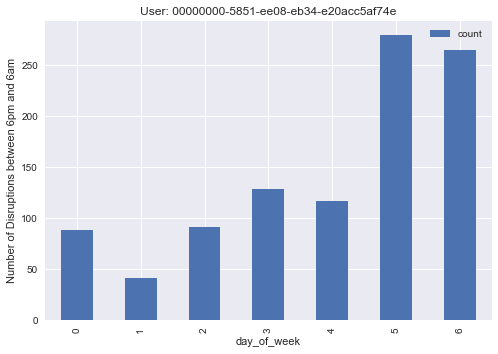

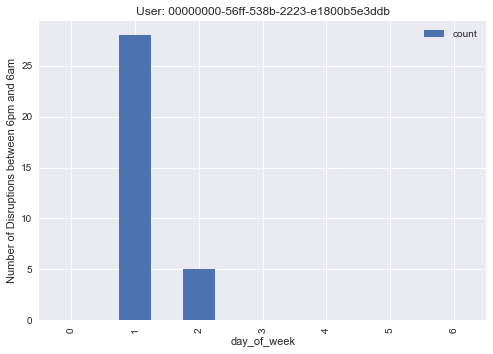

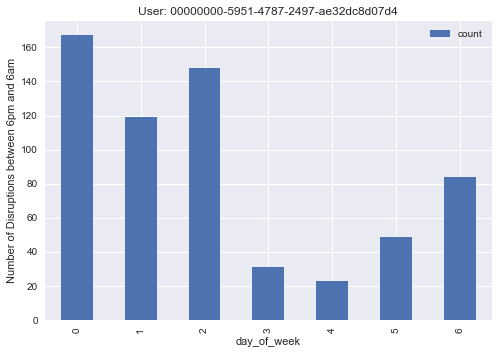

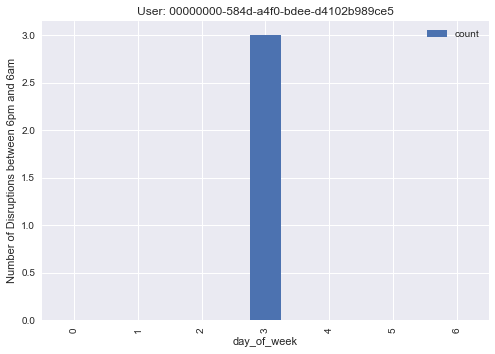

In [23]:
for key, item in sleep_disruptionsbyday_main.items():
    item.plot(kind = 'bar', title = 'User: ' + key)
    plt.ylabel('Number of Disruptions between 6pm and 6am')

## Comparing individual user disturbances with overall ongo user disturbances

In [24]:
#Dictionary of unique data frames for each owner
data_owners = {}
for i in owners:
    data_owners[i] = data_sample_lucas[data_sample_lucas.owner == i].drop(['_id', 'sourceId', 'sourceName', 'value', 'content', 'originalData', 'createdAt'], axis = 1)

In [25]:
sleep_disruptionsbyday = {}
for key, item in sleep_disruptionsbyday_main.items():
    sleep_disruptionsbyday[key] = item.add(sleep_disruptionsbyday_alt[key], fill_value = 0)
    sleep_disruptionsbyday[key]['avg'] = sleep_disruptionsbyday[key]['count']/7/(len(sleep_owners_alt))
#sleep_disruptionsbyday['00000000-56ff-538b-2223-e1800b5e3ddb']
for key, item in sleep_disruptionsbyday.items():
    print(item)

              count        avg
day_of_week                   
0            1974.0  70.500000
1            1797.0  64.178571
2            1699.0  60.678571
3            1859.0  66.392857
4            1715.0  61.250000
5            1022.0  36.500000
6            1229.0  43.892857
              count        avg
day_of_week                   
0            1482.0  52.928571
1            1258.0  44.928571
2            1699.0  60.678571
3            2091.0  74.678571
4            2280.0  81.428571
5             842.0  30.071429
6            1310.0  46.785714
             count       avg
day_of_week                 
0            226.0  8.071429
1            167.0  5.964286
2            198.0  7.071429
3             83.0  2.964286
4             89.0  3.178571
5             55.0  1.964286
6            114.0  4.071429
             count       avg
day_of_week                 
0             12.0  0.428571
1              0.0  0.000000
2              0.0  0.000000
3             17.0  0.607143
4      

In [26]:
disturbances

,count
day_of_week,
0,0.278088
1,0.247310
2,0.274479
3,0.318262
4,0.273185
5,0.199374
6,0.228789


In [27]:
#Adding column to denote whether disruptions above average or below
import scipy as sp
for key, item in sleep_disruptionsbyday.items():
    item['Above Ongo Average'] = list(sp.greater(list(item['avg']), list(disturbances['count'])))
for key, item in sleep_disruptionsbyday.items():
    print(item)

              count        avg  Above Ongo Average
day_of_week                                       
0            1974.0  70.500000                True
1            1797.0  64.178571                True
2            1699.0  60.678571                True
3            1859.0  66.392857                True
4            1715.0  61.250000                True
5            1022.0  36.500000                True
6            1229.0  43.892857                True
              count        avg  Above Ongo Average
day_of_week                                       
0            1482.0  52.928571                True
1            1258.0  44.928571                True
2            1699.0  60.678571                True
3            2091.0  74.678571                True
4            2280.0  81.428571                True
5             842.0  30.071429                True
6            1310.0  46.785714                True
             count       avg  Above Ongo Average
day_of_week                      

## Working with Averages in sleep duration


In [ ]:
for key, item in data_owners.items():
    avg_disruptions = [disruptionsitem['day_of_week']]
    sleep_disruptionsbyday_main = 

# Steps

In [47]:
#Steps - Matt
    #What day do you step the most? Least? 
    #What time of day do you step the most? 
    #What is the correlation between steps and sleep?
    #What is the correlation between avg steps and BMI/Weight/Heart Rate/Body Fat/ by months? 
    #On what days of the week is the user taking less steps than their average? Less than average of other users? 
     
#Next - Matt
    #Differences in other variables on days with more/extra sleep. Some questions to consider include
    #'do days with more steps on average look like they have more sleep?' 
    #Look at data split between days with above/average amount of sleep. Also look at data that was one 
    #standard deviation above/below average amount of steps. 
    


### code 

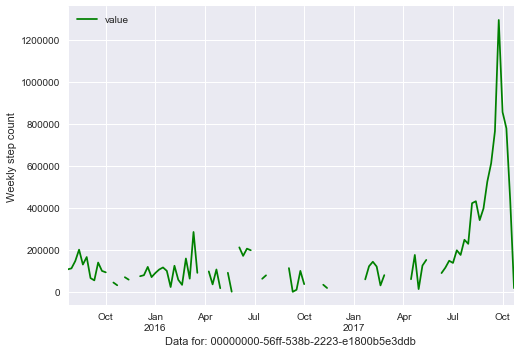

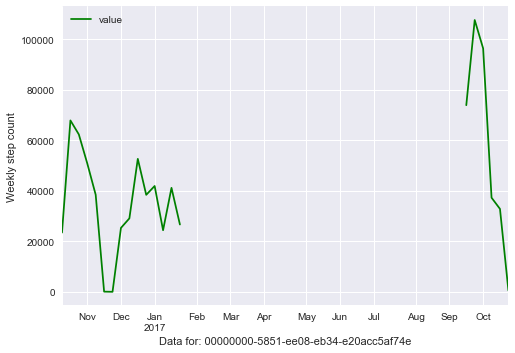

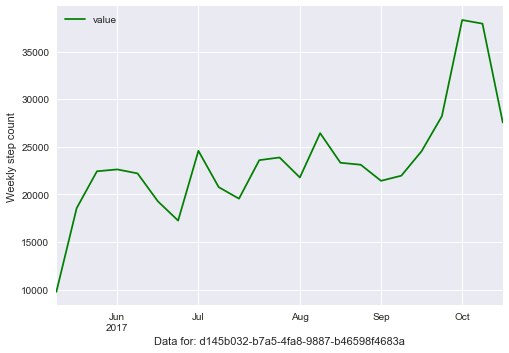

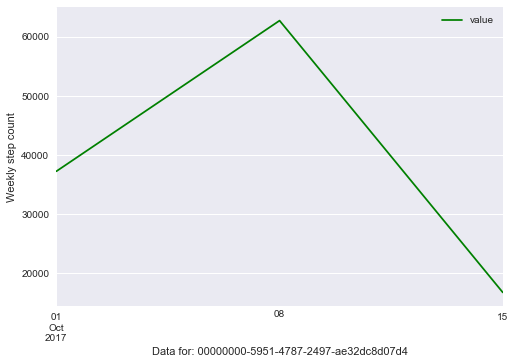

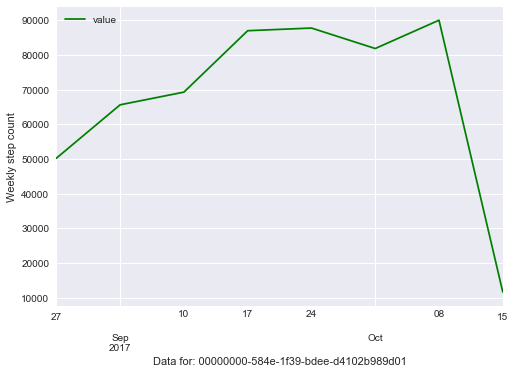

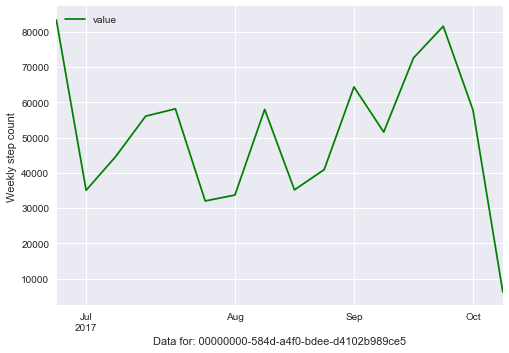

In [48]:
# weekly steps
data_sample = data_sample.copy()
steps = data_sample[data_sample['type'] == 'health-step-count']
steps.head()
steps.index = steps['startDate']
steps['value'] = pd.Series(steps['value']).convert_objects(convert_numeric=True)

for owner in steps['owner'].unique():
    steps[steps['owner'] == owner][['value']].resample('W').sum().plot(color='green')
    plt.xlabel("Data for: " + owner)
    plt.ylabel("Weekly step count")

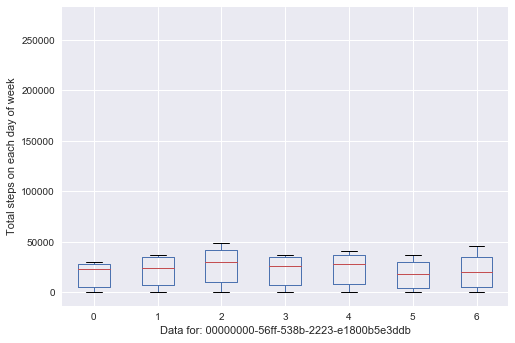

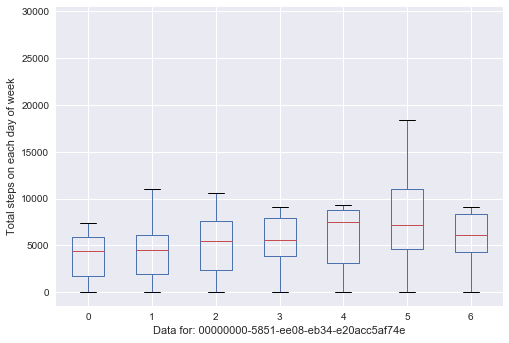

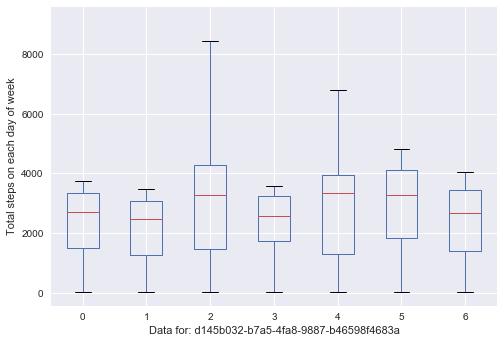

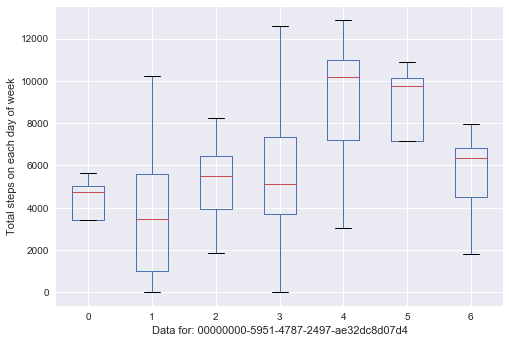

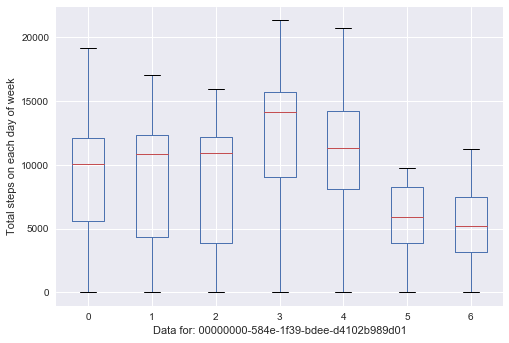

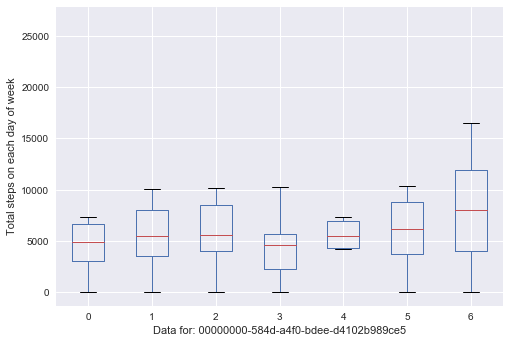

In [49]:
# steps by day of the week
for owner in steps['owner'].unique():
    data_by_owner = steps[steps['owner'] == owner][['value']]
    stats = data_by_owner.resample('D').sum().groupby(lambda x: x.dayofweek).describe()
    # print(stats)
    stats.transpose().plot(kind='box')
    plt.xlabel("Data for: " + owner)
    plt.ylabel("Total steps on each day of week")

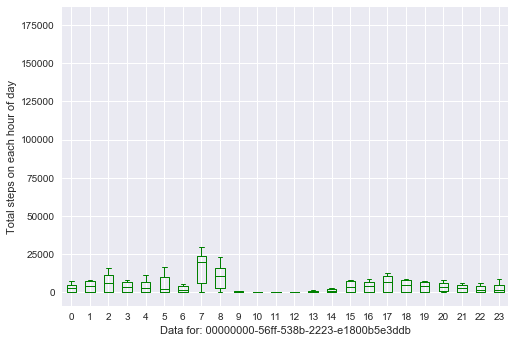

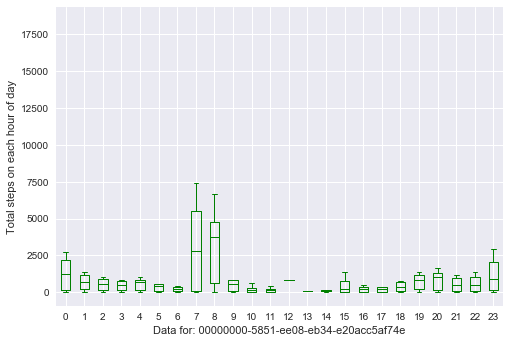

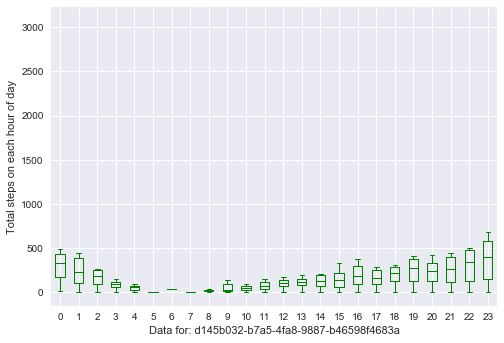

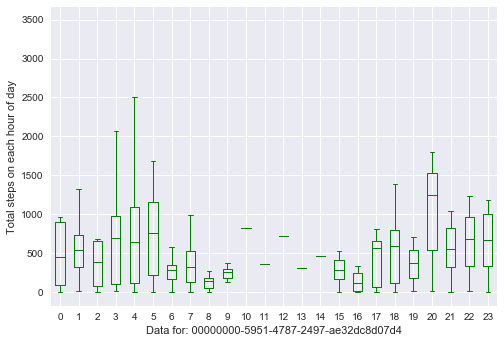

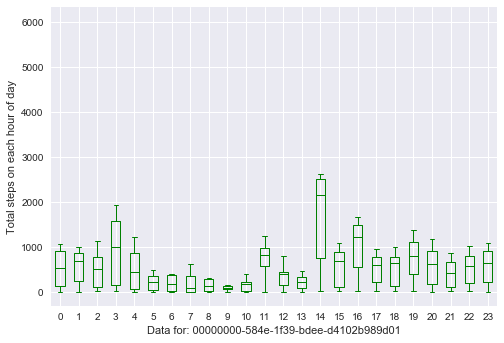

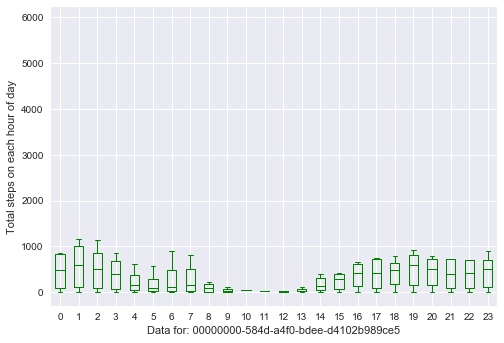

In [50]:
# steps by time of day
for owner in steps['owner'].unique():
    data_by_owner = steps[steps['owner'] == owner][['value']]
    d = data_by_owner.resample('H').sum().groupby(lambda x: x.hour).describe()
    d.transpose().plot(kind='box', color='green')
    plt.xlabel("Data for: " + owner)
    plt.ylabel("Total steps on each hour of day")

# Heart Rate

In [51]:
#Heart-Rate - John
    #Heart Rate over time. 
    #In the past 90 days, average heart rate rates
    #Heart rate max/min past 90 days 
    #Is your heart rate lower/higher than the national average? 
    
#Next Steps  
    #Differences in activity (steps,HR) on days with more/less HR
    #Include also, same as above, but for a whole standard deviation above/below the average. 

### code 

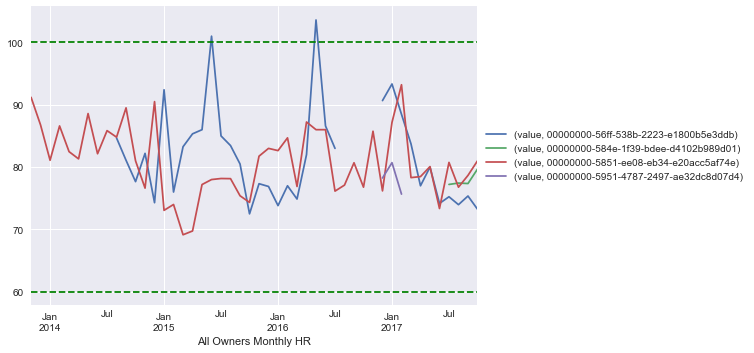

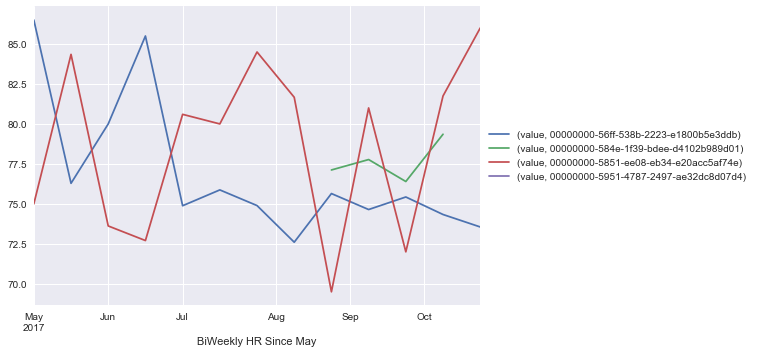

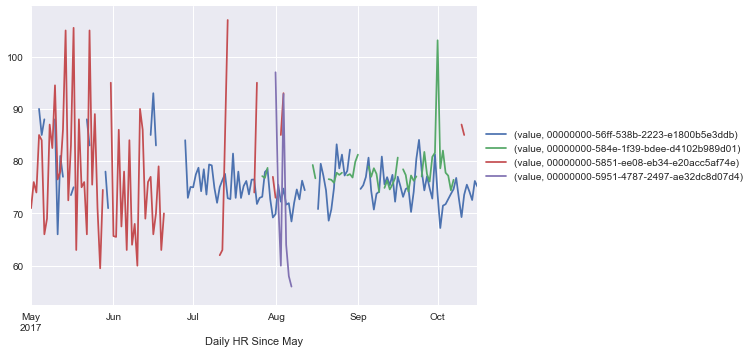

In [52]:
data_sample = data_sample.copy()
heartrate_df = data_sample[data_sample['type'] == 'health-heart-rate']  
heartrate_df.index = heartrate_df['startDate']
national_avg_lower = 60
national_avg_upper = 100

#Heart Rate Over Time for Users

heartrate_df['value'] = pd.Series(heartrate_df['value']).convert_objects(convert_numeric=True)
heartrate_df.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('M').mean().plot()   
plt.axhline(y=national_avg_lower, color='g', linestyle='--')
#plt.text(y=national_avg_lower,s='normal HR lower range',rotation=90,x=0)
plt.axhline(y=national_avg_upper, color='g', linestyle='--')
#plt.text(y=national_avg_upper,s='normal HR upper range',rotation=90,x=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('All Owners Monthly HR')


#Heart Rate Since May 
May = pd.Timestamp('20170501')
heartrate_df_jan = heartrate_df[heartrate_df['startDate'] > May]
heartrate_df_jan.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('2W').mean().plot()   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('BiWeekly HR Since May')

heartrate_df_jan = heartrate_df[heartrate_df['startDate'] > May]
heartrate_df_jan.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('D').mean().plot()   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Daily HR Since May')

In [53]:
#Looking @ Statistics in the Past 90 Days 
drange = datetime.datetime.today() - pd.Timedelta(days=90)
heart_rate_90days = data_sample[(data_sample['type'] == 'health-heart-rate') & (data_sample['startDate'] > drange)]
heart_rate_90days['value'] = pd.Series(heart_rate_90days['value']).convert_objects(convert_numeric=True)
heart_rate_90days.reset_index()
stats = heart_rate_90days.groupby('owner',as_index=False).agg({
    'value':
    {'HR sum':'sum',
     'HR avg':'mean',
     'HR max':'max',
     'HR min':'min',
     'HR count':'count',
    'HR STD':'std'}})
stats

owner      value                           \
                                            HR sum     HR avg HR max HR min   
0  00000000-56ff-538b-2223-e1800b5e3ddb  2277184.0  74.627515  131.0   32.0   
1  00000000-584e-1f39-bdee-d4102b989d01   470782.0  77.699620  138.0   48.0   
2  00000000-5851-ee08-eb34-e20acc5af74e     3456.0  78.545455   95.0   55.0   
3  00000000-5951-4787-2497-ae32dc8d07d4     1788.0  74.500000  111.0   56.0   

                       
  HR count     HR STD  
0    30514  11.231306  
1     6059   8.242440  
2       44  10.339481  
3       24  19.509195

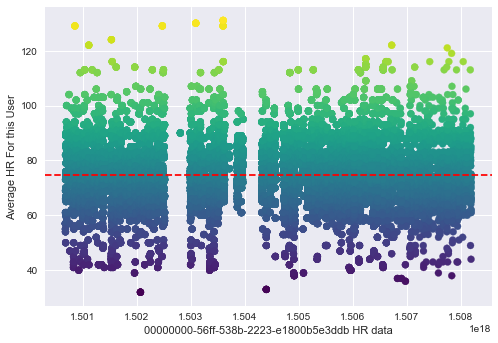

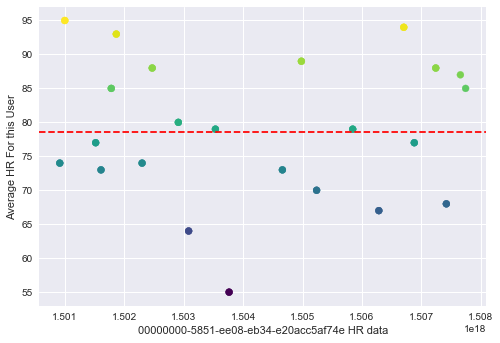

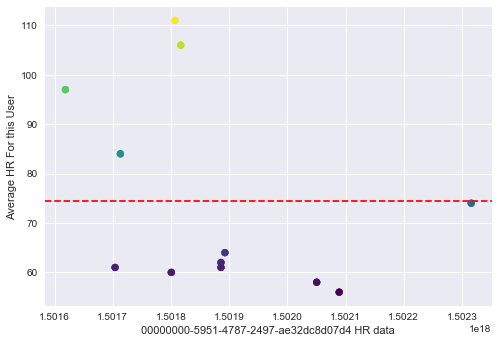

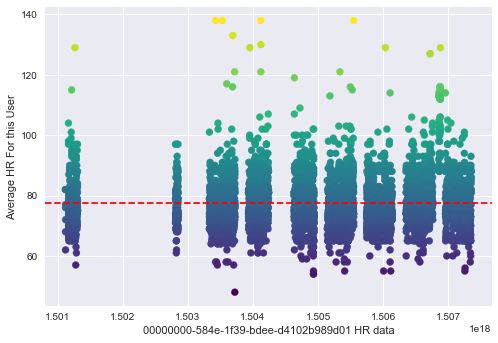

In [54]:
#Individual Plotting & Information  
heart_rate_90days = data_sample[(data_sample['type'] == 'health-heart-rate') & (data_sample['startDate'] > drange)]
heart_rate_90days.index = heart_rate_90days['startDate']
heart_rate_90days['value'] = pd.Series(heart_rate_90days['value']).convert_objects(convert_numeric=True)
heart_rate_90days['ts'] = heart_rate_90days['startDate'].dt.values.astype(np.int64) #// 10 ** 9


def HR_graph(owner): #punch in an owners id, will graph HR avg past 90 days
    muj = heart_rate_90days[heart_rate_90days['owner'] == owner]
    x = plt.scatter('ts', 'value', data=muj,c='value',cmap='viridis')
    if owner in stats['owner'].unique():
        plt.axhline(y=stats[stats['owner'] == owner]['value']['HR avg'].iloc[0],color='r',linestyle='--')
        plt.ylabel('Average HR For this User')
    plt.xlabel(owner + ' HR data')
    plt.show()
    return x


for i in heart_rate_90days['owner'].unique():
    HR_graph(i)

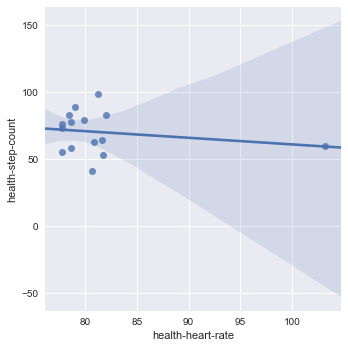

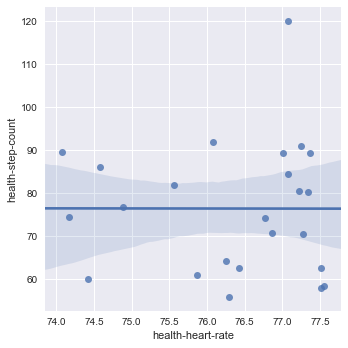

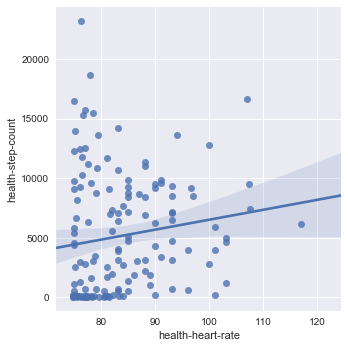

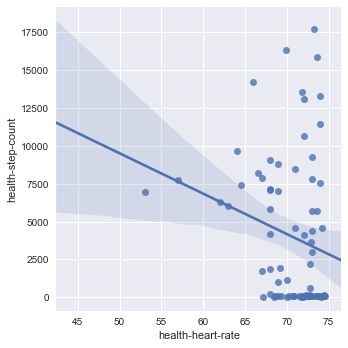

In [55]:
HR = data_sample[data_sample['type'] == 'health-heart-rate']
def fifty(owner): #takes in owner, outputs two tables, one for when HR is above average, one for below 
    date_indexed = data_sample.copy()
    date_indexed.index = date_indexed['startDate']
    date_indexed['value'] = pd.Series(date_indexed['value']).convert_objects(convert_numeric=True)
    date_indexed
    date_indexed = date_indexed[date_indexed['owner'] == owner] #these two lines give us the original table, but resampled D for a user
    date_indexed = date_indexed.loc[:,['type','value','startDate']].groupby(['type','startDate']).mean().unstack(level=0).resample('D').mean()   
    date_indexed.columns = date_indexed.columns.droplevel()

    avg = stats[stats['owner'] == owner]['value']['HR avg'].iloc[0]
    above = date_indexed[date_indexed['health-heart-rate'] > avg]
    below = date_indexed[date_indexed['health-heart-rate'] < avg]
    
    sns.lmplot('health-heart-rate','health-step-count',above)
    
    sns.lmplot('health-heart-rate','health-step-count',below)
    
    return


#next steps, will look into the specific behavior when below,above average.    
    
fifty('00000000-584e-1f39-bdee-d4102b989d01')
fifty('00000000-56ff-538b-2223-e1800b5e3ddb')


In [56]:
def fifty_table(owner):
    date_indexed = data_sample.copy()
    date_indexed.index = date_indexed['startDate']
    date_indexed['value'] = pd.Series(date_indexed['value']).convert_objects(convert_numeric=True)
    date_indexed = date_indexed[date_indexed['owner'] == owner] #these two lines give us the original table, but resampled D for a user
    date_indexed = date_indexed.loc[:,['type','value','startDate']].groupby(['type','startDate']).mean()
    #date_indexed = date_indexed.groupby(pd.Grouper(freq='D', level=-1)).mean()


    
    level_values = date_indexed.index.get_level_values
    result = (date_indexed.groupby([level_values(i) for i in [0,0]]
                      +[pd.Grouper(freq='D', level=-1)]).mean())
    result.index = result.index.droplevel(level=0)
    result.index = result.index.droplevel(level=1)

    return date_indexed



x = fifty_table('00000000-56ff-538b-2223-e1800b5e3ddb')
x.groupby(x.index.get_level_values(0)).agg({
    'value':
    {'HR sum':'sum',
     'HR avg':'mean',
     'HR max':'max',
     'HR min':'min',
     'HR count':'count',
     'HR STD':'std'}})

value                                     \
                              HR sum       HR avg        HR max  HR min   
type                                                                      
health-bmi              1.132368e+04    26.643946     29.057550  24.880   
health-body-fat         9.648301e+01     0.251258      0.289421   0.000   
health-fat-free-mass    1.996985e+04    52.970432     55.536000  51.337   
health-fat-mass-weight  6.729397e+03    17.849859     21.447000  14.815   
health-heart-rate       7.384700e+05    74.827237    134.000000  32.000   
health-height           1.630000e+00     1.630000      1.630000   1.630   
health-sleep            5.600000e+02     0.343980      1.000000   0.000   
health-step-count       4.132458e+06   209.812057  26212.000000   1.000   
health-step-distance    1.737918e+06  4177.687776  18144.430000   7.049   
health-weight           3.594556e+04    70.758969     77.203003  65.700   

                                              
                       HR count       HR STD  
type                                          
health-bmi                  425     0.519049  
health-body-fat             384     0.019695  
health-fat-free-mass        377     0.682147  
health-fat-mass-weight      377     1.321123  
health-heart-rate          9869    11.512116  
health-height                 1          NaN  
health-sleep               1628     0.475181  
health-step-count         19696  1161.948926  
health-step-distance        416  3364.848646  
health-weight               508     1.318125

# BMI/Body Fat/Weight



In [57]:
#Bmi/Body Fat/Weight -Luqmaan/Sebastian 
    #How has BMI 
    #BMI average versus others 
    #BMI rate of change compared to other people's rates of change 
    #Weight over time/lowest weight/highest weight 
    #biggest weight change in a month span 
    #Weight change correlated with avg steps. Does avg steps imply more weight loss?
    
#Next Steps 
    #When average weight change is negative/positive, what does other data look like. Meaning if user X 
    #lost 2 pounds in one month, what other activity was different, if any? 
    #Table with numbers and graphs. Focus on steps/sleeps. 
    #Do the same for the above, but look at when average weight change was a SD above/below the average.
    #p.s. for rate of change you probably want to make another column that has the +/- from the last measurement.
    #for that user. 

### code 

In [58]:

x1 = data_sample.type
x2 = data_sample.value

types = ['health-bmi','health-body-fat','health-weight', 'health-step-count']

def prepare_table(x, y,time='D',data_sample=data_sample):
    steps = data_sample[data_sample['type'] == x]
    bodyfat = data_sample[data_sample['type'] == y]


    steps.index = steps['startDate']
    bodyfat.index = bodyfat['startDate']


    steps['value'] = pd.to_numeric(steps['value'])
    steps = steps.loc[:,'value']
    if x == 'health-step-count':
        steps = steps.resample(time).sum()
    else:
        steps = steps.resample(time).mean()


    bodyfat['value'] = pd.to_numeric(bodyfat['value'])
    bodyfat = bodyfat.loc[:,'value']
    bodyfat = bodyfat.resample(time).mean()

    steps = steps.to_frame('first')
    steps['second'] = bodyfat
    
    return steps

def plotter(steps):
    steps = steps.dropna()
    x = steps['first'].values
    y = steps['second'].values
    x = x.reshape(len(x), 1)
    y = y.reshape(len(x), 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    plt.scatter(x, y,  color='black')
    plt.plot(x, regr.predict(x), color='yellow', linewidth=2)
    
    corr_info = stats.stats.pearsonr(x, y)
    r = corr_info[0][0]
    p = corr_info[1][0]
    return r, p


users = data_sample['owner'].unique()
bmi = data_sample[data_sample['type'] == 'health-bmi']
bmi.index = bmi['startDate']
bmi['value'] = pd.Series(bmi['value']).convert_objects(convert_numeric=True)

           value
count  39.000000
mean   26.617052
std     0.584003
min    24.880000
25%    26.185133
50%    26.663805
75%    27.046300
max    27.867441
           value
count  48.000000
mean   26.613121
std     0.475184
min    25.331826
25%    26.272970
50%    26.680381
75%    26.994899
max    27.469894
           value
count   1.000000
mean   21.481277
std          NaN
min    21.481277
25%    21.481277
50%    21.481277
75%    21.481277
max    21.481277


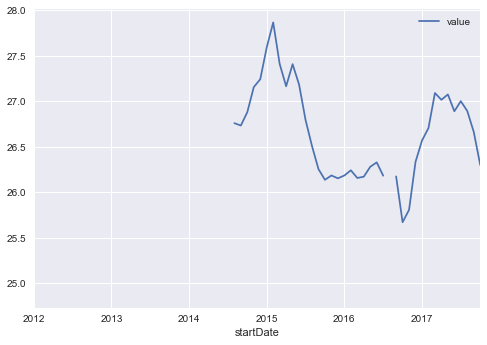

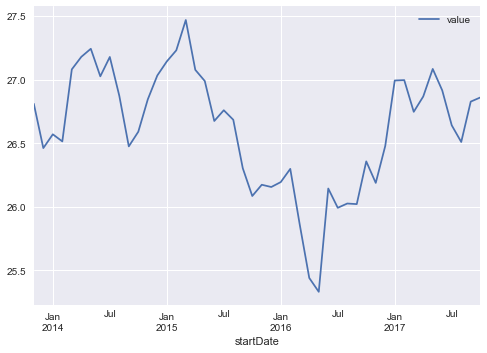

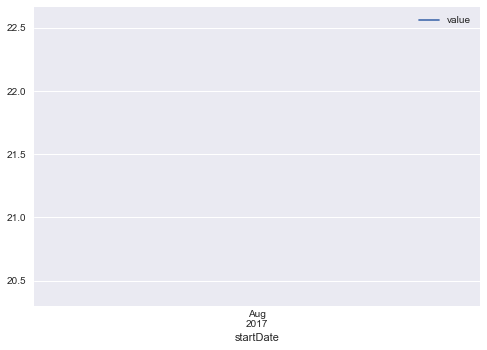

In [59]:
# BMI by month over the whole period
bmi_means = {}
for owner in bmi['owner'].unique():
    data_by_owner = bmi[bmi['owner'] == owner][['value']]
    resampled_data = data_by_owner.resample('M').mean()
    resampled_data.plot()
    print(resampled_data.describe())
    mean = resampled_data.describe().loc['mean', 'value']
    bmi_means[owner] = mean

           value
count  38.000000
mean    0.001571
std     0.015163
min    -0.019238
25%    -0.006506
50%     0.000864
75%     0.005267
max     0.075564
           value
count  47.000000
mean    0.000091
std     0.010275
min    -0.016711
25%    -0.007191
50%     0.001203
75%     0.004428
max     0.032079
       value
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN


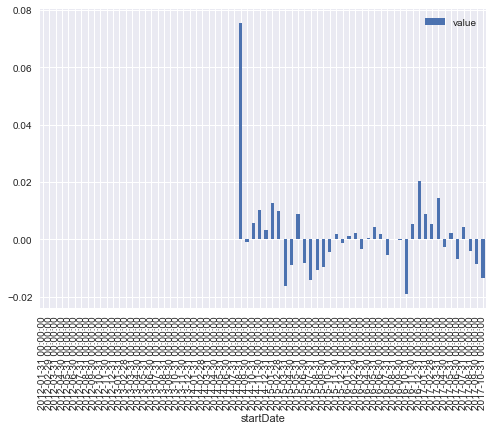

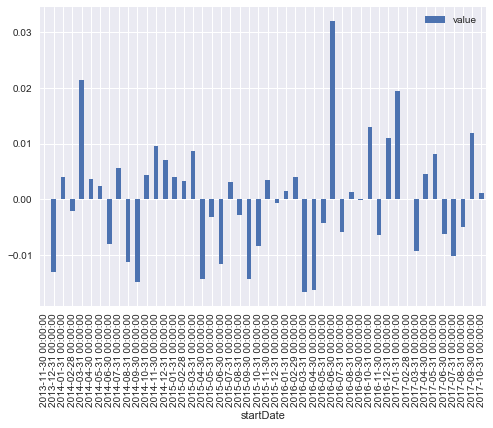

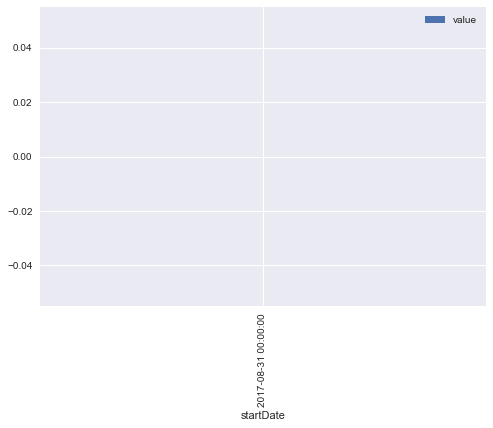

In [60]:
# pct_change slope comparison of each bmi
for owner in bmi['owner'].unique():
    data_by_owner = bmi[bmi['owner'] == owner][['value']]
    resampled_data = data_by_owner.resample('M').mean().pct_change()
    resampled_data.plot(kind='bar')
    print(resampled_data.describe())
    mean = resampled_data.describe().loc['mean', 'value']
weight = data_sample[data_sample['type'] == 'health-weight']
weight.index = weight['startDate']
weight['value'] = pd.Series(weight['value']).convert_objects(convert_numeric=True)    

           value
count  39.000000
mean   70.698724
std     1.588081
min    65.700000
25%    69.577740
50%    70.830029
75%    71.859314
max    74.041000
           value
count  48.000000
mean   86.226737
std     1.539990
min    82.075113
25%    85.124421
50%    86.444431
75%    87.466679
max    89.002452
           value
count   5.000000
mean   59.692756
std     1.056491
min    58.740211
25%    58.967007
50%    59.193806
75%    60.327785
max    61.234970
            value
count    1.000000
mean   108.408488
std           NaN
min    108.408488
25%    108.408488
50%    108.408488
75%    108.408488
max    108.408488
           value
count  12.000000
mean   71.574003
std     3.471932
min    66.700759
25%    68.837036
50%    70.465419
75%    74.959217
max    76.257950
           value
count   1.000000
mean   54.431084
std          NaN
min    54.431084
25%    54.431084
50%    54.431084
75%    54.431084
max    54.431084


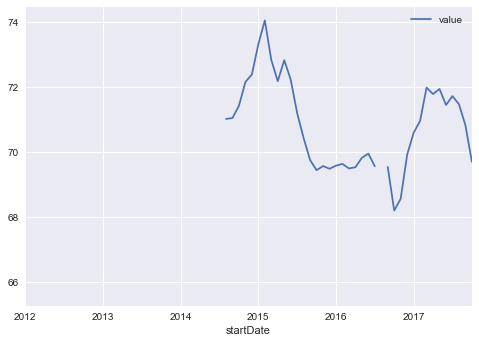

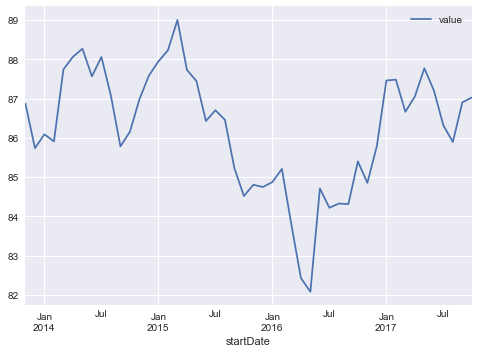

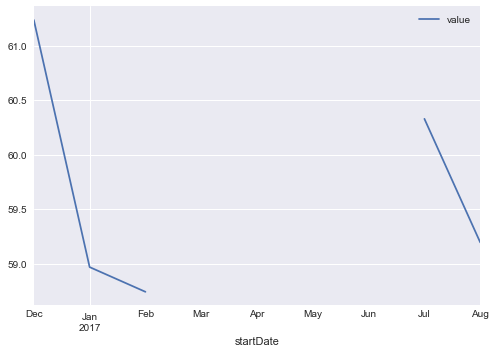

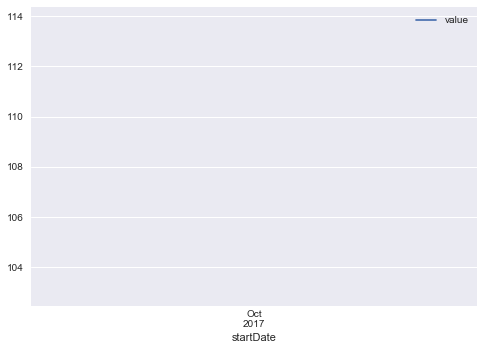

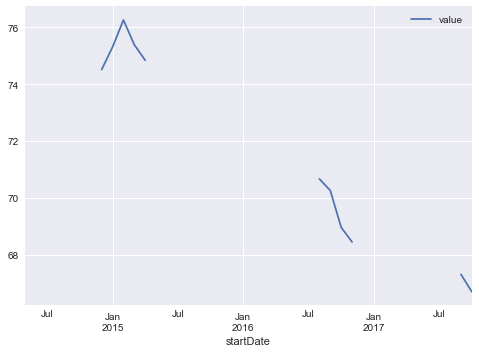

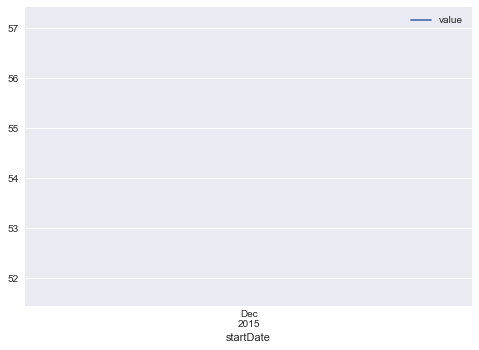

In [61]:
#weight over time
weight_info = {}
for owner in weight['owner'].unique():
    data_by_owner = weight[weight['owner'] == owner][['value']]
    resampled_data = data_by_owner.resample('M').mean()
    resampled_data.plot()
    print(resampled_data.describe())
    mean = resampled_data.describe().loc['mean', 'value']
    min_ = data_by_owner.describe().loc['min', 'value']
    max_ = data_by_owner.describe().loc['max', 'value']
    weight_info[owner] = {'mean': mean, 'min': min_, 'max': max_}

In [62]:
# weight with means, mins, and maxs
for owner in weight_info:
    print('Owner {} has monthly weight mean of {}, min of {}, max of {}'.format(owner, weight_info[owner]['mean'],  weight_info[owner]['min'],  weight_info[owner]['max']))

Owner 00000000-56ff-538b-2223-e1800b5e3ddb has monthly weight mean of 70.69872441182706, min of 65.7, max of 77.2030029296875
Owner 00000000-5851-ee08-eb34-e20acc5af74e has monthly weight mean of 86.22673692480238, min of 80.36399999999999, max of 90.9640045166016
Owner 00000000-5951-4787-2497-ae32dc8d07d4 has monthly weight mean of 59.692755833503895, min of 58.7402114868164, max of 61.2349700927734
Owner d145b032-b7a5-4fa8-9887-b46598f4683a has monthly weight mean of 108.40848799999999, min of 108.40848799999999, max of 108.40848799999999
Owner 00000000-584d-a4f0-bdee-d4102b989ce5 has monthly weight mean of 71.57400326012247, min of 65.997689835, max of 77.56429527
Owner 00000000-584e-1f39-bdee-d4102b989d01 has monthly weight mean of 54.4310844, min of 54.4310844, max of 54.4310844


In [63]:
# biggest change in a month period
for owner in weight_info:
    #print "Owner {}: ".format(owner)
    a = weight[weight['owner'] == owner].groupby(pd.TimeGrouper("M"))
    print("\nNEXT USER\n")
    for i, j in a:
        #j = j.dropna(axis = 1, how = 'all')
        maxi = j.max()
        mini = j.min()
        try:
            diff = j.max()['value'] - j.min()['value']
            print ("Weight change in the month of {} for user {} is {}".format(maxi['startDate'], owner, diff))
        except(KeyError):
            None
    #plt.plot(a)
    #plt.show()


NEXT USER

Weight change in the month of 2012-01-20 07:59:59 for user 00000000-56ff-538b-2223-e1800b5e3ddb is 0.0
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change i

Weight change in the month of 2014-11-29 20:39:34 for user 00000000-5851-ee08-eb34-e20acc5af74e is 4.2100072631835985
Weight change in the month of 2014-12-24 16:23:34 for user 00000000-5851-ee08-eb34-e20acc5af74e is 2.897004943847705
Weight change in the month of 2015-01-30 15:53:02 for user 00000000-5851-ee08-eb34-e20acc5af74e is 3.0740022583008084
Weight change in the month of 2015-02-28 19:36:30 for user 00000000-5851-ee08-eb34-e20acc5af74e is 3.3750068969727067
Weight change in the month of 2015-03-27 15:26:04 for user 00000000-5851-ee08-eb34-e20acc5af74e is 3.121004516601616
Weight change in the month of 2015-04-30 15:31:14 for user 00000000-5851-ee08-eb34-e20acc5af74e is 2.032002990722688
Weight change in the month of 2015-05-28 15:34:19 for user 00000000-5851-ee08-eb34-e20acc5af74e is 2.400000488281208
Weight change in the month of 2015-06-30 00:35:01 for user 00000000-5851-ee08-eb34-e20acc5af74e is 3.127001342773397
Weight change in the month of 2015-07-23 17:40:17 for user 00

Weight change in the month of nan for user 00000000-584d-a4f0-bdee-d4102b989ce5 is nan
Weight change in the month of nan for user 00000000-584d-a4f0-bdee-d4102b989ce5 is nan
Weight change in the month of nan for user 00000000-584d-a4f0-bdee-d4102b989ce5 is nan
Weight change in the month of nan for user 00000000-584d-a4f0-bdee-d4102b989ce5 is nan
Weight change in the month of nan for user 00000000-584d-a4f0-bdee-d4102b989ce5 is nan
Weight change in the month of 2017-09-29 16:44:00 for user 00000000-584d-a4f0-bdee-d4102b989ce5 is 0.0
Weight change in the month of 2017-10-03 01:53:00 for user 00000000-584d-a4f0-bdee-d4102b989ce5 is 1.406139115508097

NEXT USER

Weight change in the month of 2015-12-25 03:21:09.693000 for user 00000000-584e-1f39-bdee-d4102b989d01 is 0.0
